In [ ]:
!pip3 install torchei torchvision matplotlib
!wget https://raw.githubusercontent.com/TorchEI/TorchEI/main/data/ilsvrc_valid8.pt
!wget https://raw.githubusercontent.com/TorchEI/TorchEI/main/data/imagenet_classes.txt

In [1]:
import torch
import torchei
import random

from matplotlib import pyplot as plt
from copy import deepcopy
from IPython.display import display
from torchvision import models

/home/forceless/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/forceless/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/forceless/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


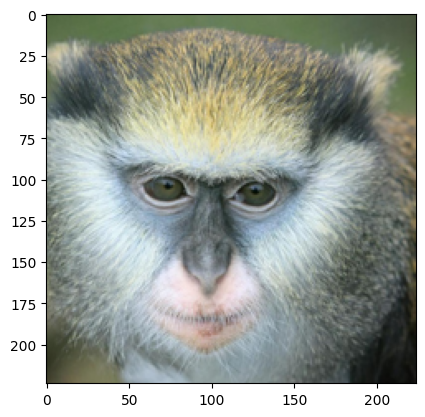

this is a patas


In [2]:
model = models.resnet18(pretrained=True)
data = torch.load("ilsvrc_valid8.pt")
to_cuda = torch.cuda.is_available()
fault_model = torchei.fault_model(model, data, to_cuda=to_cuda)

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

plt.imshow(data[0][0].permute(1, 2, 0))
plt.show()
print(f"this is a {categories[torchei.get_result(model,data)[0].int().item()]}")

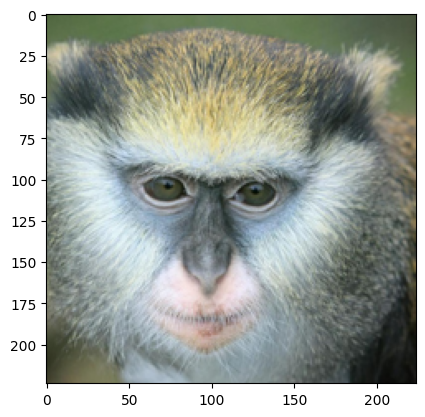

this is a tench


In [3]:
inject = fault_model.emat_wrapper(1e-5)
inject()
plt.imshow(data[0][0].permute(1, 2, 0))
plt.show()
print(f"this is a {categories[torchei.get_result(fault_model.model,data)[0].int().item()]}")

In [3]:
rel = fault_model.emat_attack(10, 1e-5)
sern_rel = fault_model.sern_calc(output_class=1000)
fault_model.reluA_protection()
pro_rel = fault_model.emat_attack(10, 1e-5)

100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

The Reliability of model under error rate = 1e-3 is 0.987500011920929


In [6]:
print(f"The Reliability of model under error rate = 1e-3 is {rel}")
print(f"The Reliability of model calculated by SERN is {sern_rel}")
print(f"The Reliability of model under protection is {pro_rel}")

The Reliability of model under error rate = 1e-3 is 0.987500011920929
The Reliability of model calculated by SERN is [tensor(0.0293), tensor(0.0146), tensor(0.0145), tensor(0.0144), tensor(0.0143), tensor(0.0149), tensor(0.0141), tensor(0.0154), tensor(0.0139), tensor(0.0137), tensor(0.0145), tensor(0.0133), tensor(0.0153), tensor(0.0128), tensor(0.0122), tensor(0.0135), tensor(0.0106), tensor(0.0148), tensor(0.0078), tensor(7.5580e-05), tensor(7.6523e-06)]
The Reliability of model under protection is 0.574999988079071


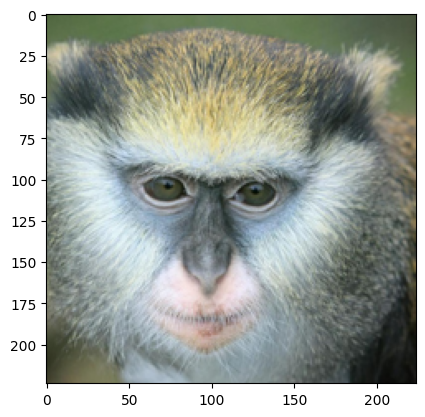

this is a patas


In [4]:
fault_model.reluA_protection()
inject = fault_model.emat_wrapper(1e-5)
inject()
plt.imshow(data[0][0].permute(1, 2, 0))
plt.show()
print(f"this is a {categories[torchei.get_result(fault_model.model,data)[0].int().item()]}")